In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import glob
import os
import metpy
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from datetime import datetime
import xarray as xr
from pint import UnitRegistry
ureg = UnitRegistry()
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.api as sm
import ccgfilt
import pymannkendall as mk
from scipy.signal import argrelextrema
from datetime import datetime, timedelta
from sklearn.linear_model import TheilSenRegressor
from sklearn.utils import resample

In [8]:
# Load datasets
df = pd.read_csv("C:\\YEAR1\\NMVOC\\Data\\processed_c3h8.csv", parse_dates=['datetime'])
df

,datetime,C3H8_ppb
0,2011-01-05 00:00:00,0.70974
1,2011-01-05 02:00:00,0.78550
2,2011-01-05 04:00:00,0.72628
3,2011-01-05 06:00:00,0.94738
4,2011-01-05 08:00:00,0.74331
...,...,...
41494,2023-12-31 02:00:00,0.07656
41495,2023-12-31 04:00:00,0.11815
41496,2023-12-31 05:00:00,0.10664
41497,2023-12-31 07:00:00,0.10012


In [9]:
# helper columns with  hour, month, year
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.date
df['day'] = df['datetime'].dt.dayofyear

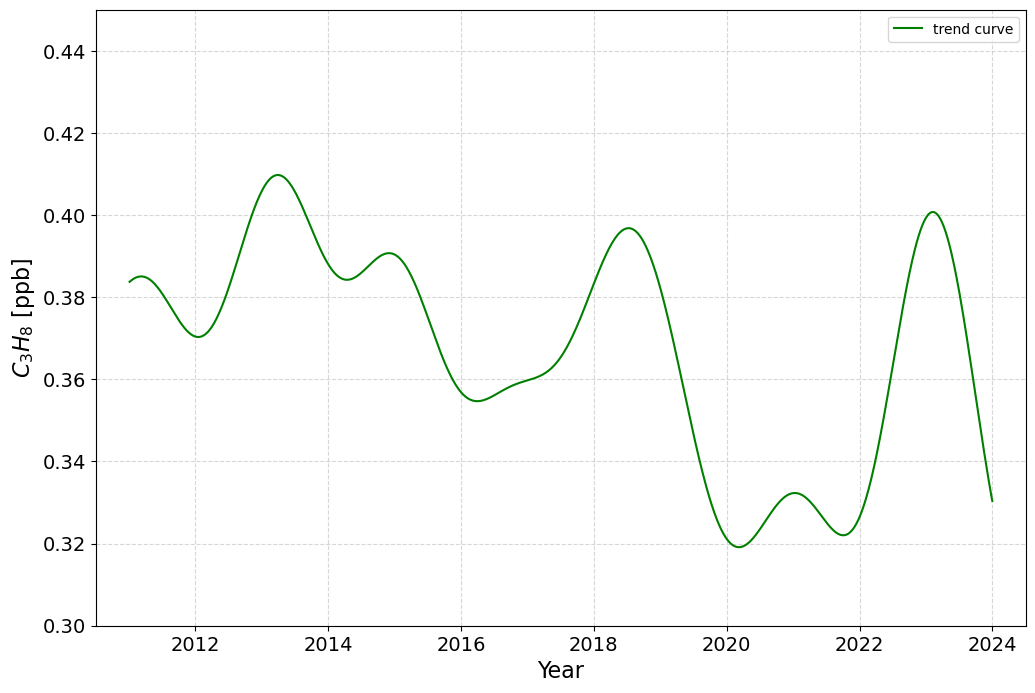

'\n\nplt.plot(x0,detrend,"red",label="detrend")\nplt.xlabel("Year")\nplt.ylabel("Propane(pmol/mol)")\nplt.legend()\nplt.savefig("co2_detrend.png", dpi=300)\nplt.show()\n'

In [10]:

#df = df.dropna()
df["index"] = [i for i in range(len(df))]
df = df.set_index('index')
#print(CO2_df.head())
df['decimal_date']= [df["datetime"][i].year+ (df["datetime"][i].dayofyear-1 + df["datetime"][i].hour/24) /365 for i in range(len(df))]

xp = df['decimal_date']
yp = df['C3H8_ppb']

#print(xp[0:10])
filt = ccgfilt.ccgFilter(xp, yp, shortterm=30, longterm = 667, sampleinterval=0, numpolyterms=3, numharmonics=4, timezero=-1, gap = 1, debug=False)
#
mm = filt.getMonthlyMeans()
amps = filt.getAmplitudes()
tcup, tcdown = filt.getTrendCrossingDates()

# get x,y data for plotting
x0 = filt.xinterp
y1 = filt.getFunctionValue(x0)
y2 = filt.getPolyValue(x0)
y3 = filt.getSmoothValue(x0)
y4 = filt.getTrendValue(x0)
# Seasonal Cycle
# x and y are original data points
trend = filt.getTrendValue(x0)
detrend = y3 - trend
harmonics = filt.getHarmonicValue(x0)
smooth_cycle = harmonics + filt.smooth - filt.trend
# residuals from the function
resid_from_func = filt.resid
# smoothed residuals
resid_smooth = filt.smooth
# trend of residuals
resid_trend = filt.trend
# residuals about the smoothed line
resid_from_smooth = filt.yp - filt.getSmoothValue(xp)
# equally spaced interpolated data with function removed
x1 = filt.xinterp
y9 = filt.yinterp

plt.figure(figsize=(12,8))
#plt.plot(xp,yp,"*",markersize=4,markeredgecolor="k", markerfacecolor="none", linewidth=1,  label="observations")
#plt.plot(x0,y1,"red",label="smooth curve")
#plt.plot(x0,y3,"blue",label="smooth plot")
#plt.plot(x0,y4,"orange")
plt.plot(x0,trend,"green",label="trend curve")
plt.xlabel("Year", fontsize= 16)
plt.ylabel("$C_3H_8$ [ppb]", fontsize= 16)
plt.tick_params(axis='both', labelsize=14)
#plt.plot(x0,detrend,"red",label="detrend")
plt.legend()
plt.xlim(2010.5,2024.5)
#plt.ylim(300,450)



# Add full grid lines on both axes
#ax.grid(True, which='major', axis='both', linestyle='--', alpha=0.6)

# Optional: Force all ticks to be on (in case visibility is cut off)
#ax.tick_params(axis='x', which='major', length=6)
#ax.tick_params(axis='y', which='major', length=6)


# Grid for both x and y axes
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
ylim = plt.ylim(0.30, 0.45)
# Add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_trend.png", dpi=300)
plt.show()
'''

plt.plot(x0,detrend,"red",label="detrend")
plt.xlabel("Year")
plt.ylabel("Propane(pmol/mol)")
plt.legend()
plt.savefig("co2_detrend.png", dpi=300)
plt.show()
'''

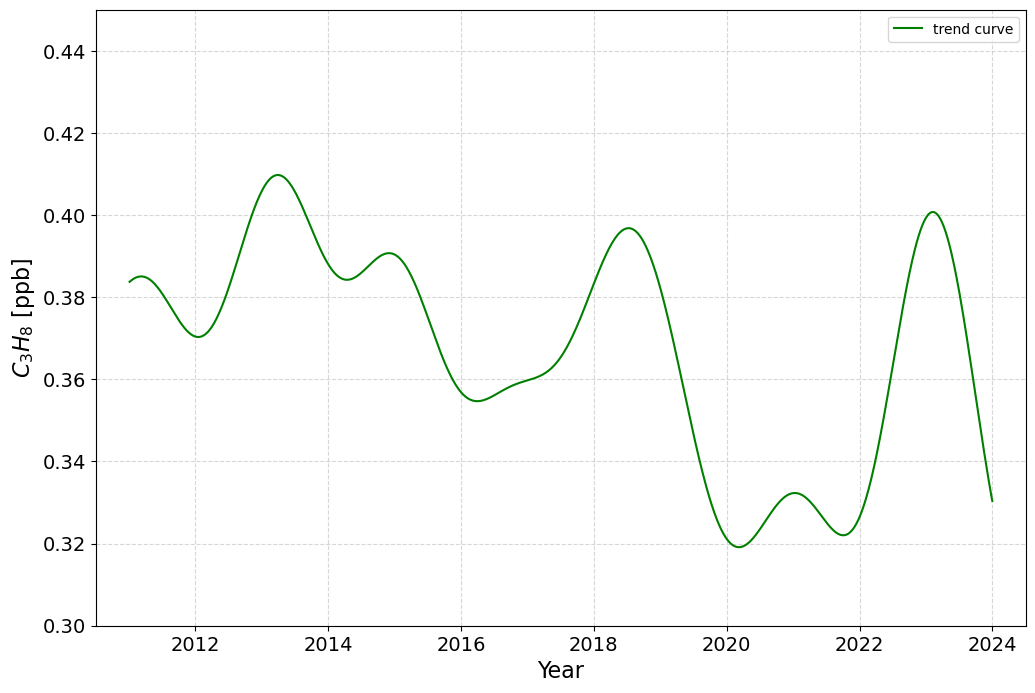

'\n\nplt.plot(x0,detrend,"red",label="detrend")\nplt.xlabel("Year")\nplt.ylabel("Propane(pmol/mol)")\nplt.legend()\nplt.savefig("co2_detrend.png", dpi=300)\nplt.show()\n'

In [4]:

#df = df.dropna()
df["index"] = [i for i in range(len(df))]
df = df.set_index('index')
#print(CO2_df.head())
df['decimal_date']= [df["datetime"][i].year+ (df["datetime"][i].dayofyear-1 + df["datetime"][i].hour/24) /365 for i in range(len(df))]

xp = df['decimal_date']
yp = df['C3H8_ppb']

#print(xp[0:10])
filt = ccgfilt.ccgFilter(xp, yp, shortterm=30, longterm = 667, sampleinterval=0, numpolyterms=3, numharmonics=4, timezero=-1, gap = 1, debug=False)
#
mm = filt.getMonthlyMeans()
amps = filt.getAmplitudes()
tcup, tcdown = filt.getTrendCrossingDates()

# get x,y data for plotting
x0 = filt.xinterp
y1 = filt.getFunctionValue(x0)
y2 = filt.getPolyValue(x0)
y3 = filt.getSmoothValue(x0)
y4 = filt.getTrendValue(x0)
# Seasonal Cycle
# x and y are original data points
trend = filt.getTrendValue(x0)
detrend = y3 - trend
harmonics = filt.getHarmonicValue(x0)
smooth_cycle = harmonics + filt.smooth - filt.trend
# residuals from the function
resid_from_func = filt.resid
# smoothed residuals
resid_smooth = filt.smooth
# trend of residuals
resid_trend = filt.trend
# residuals about the smoothed line
resid_from_smooth = filt.yp - filt.getSmoothValue(xp)
# equally spaced interpolated data with function removed
x1 = filt.xinterp
y9 = filt.yinterp

plt.figure(figsize=(12,8))
#plt.plot(xp,yp,"*",markersize=4,markeredgecolor="k", markerfacecolor="none", linewidth=1,  label="observations")
#plt.plot(x0,y1,"red",label="smooth curve")
#plt.plot(x0,y3,"blue",label="smooth plot")
#plt.plot(x0,y4,"orange")
plt.plot(x0,trend,"green",label="trend curve")
plt.xlabel("Year", fontsize= 16)
plt.ylabel("$C_3H_8$ [ppb]", fontsize= 16)
plt.tick_params(axis='both', labelsize=14)
#plt.plot(x0,detrend,"red",label="detrend")
plt.legend()
plt.xlim(2010.5,2024.5)
#plt.ylim(300,450)



# Add full grid lines on both axes
#ax.grid(True, which='major', axis='both', linestyle='--', alpha=0.6)

# Optional: Force all ticks to be on (in case visibility is cut off)
#ax.tick_params(axis='x', which='major', length=6)
#ax.tick_params(axis='y', which='major', length=6)


# Grid for both x and y axes
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
ylim = plt.ylim(0.30, 0.45)
# Add grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_trend.png", dpi=300)
plt.show()
'''

plt.plot(x0,detrend,"red",label="detrend")
plt.xlabel("Year")
plt.ylabel("Propane(pmol/mol)")
plt.legend()
plt.savefig("co2_detrend.png", dpi=300)
plt.show()
'''




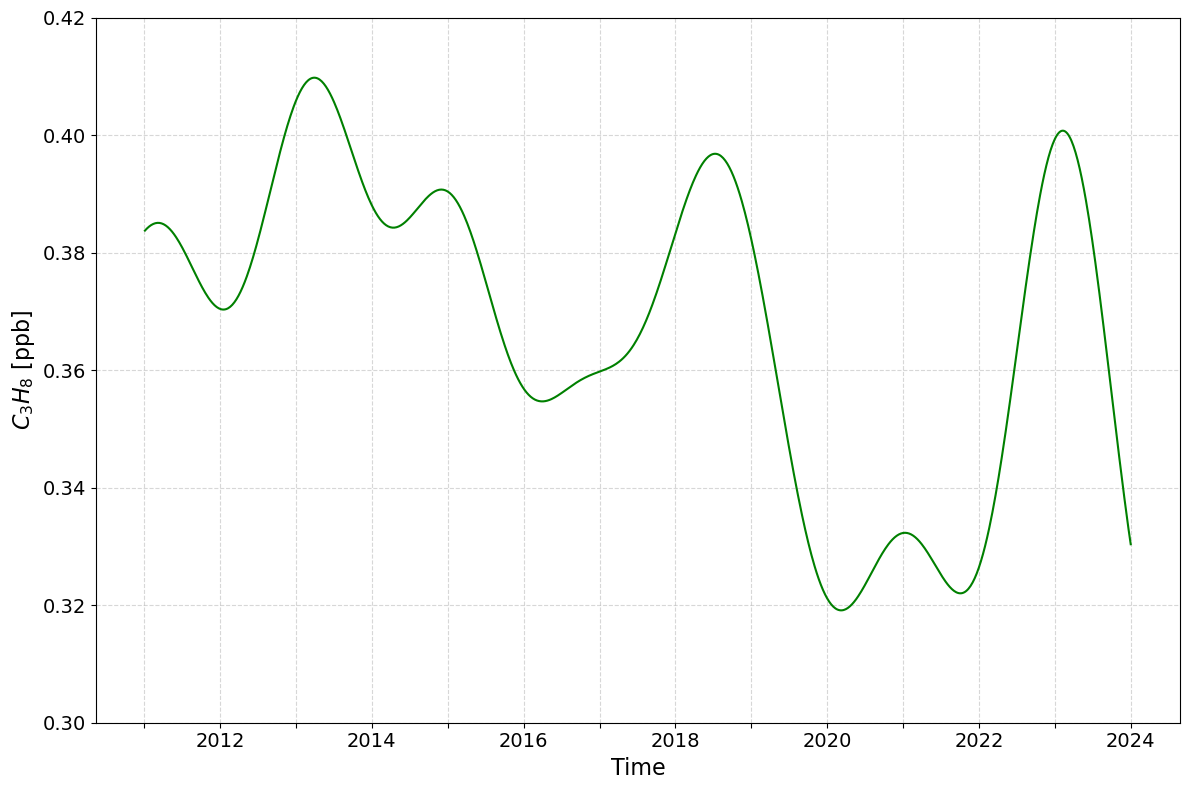

In [48]:

plt.figure(figsize=(12, 8))

# Trend curve
plt.plot(x0, trend, "green", label="trend curve")

# Labels
plt.xlabel("Time", fontsize=16)
plt.ylabel("$C_3H_8$ [ppb]", fontsize=16)
#plt.legend()

# X-axis: set ticks for each year
years = np.arange(2011, 2025, 1)
plt.xticks(ticks=years)

# Y-axis: set min/max and ticks every 0.01 (you can change to 0.005 if needed)
#plt.ylim(0.30, 0.42)
plt.yticks(np.arange(0.30, 0.43, 0.02), fontsize=14)
# Only show even years as xtick labels
plt.gca().set_xticks(years)
plt.gca().set_xticklabels([str(y) if y % 2 == 0 else "" for y in years], fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

# Save and show
plt.tight_layout()
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_trend.png", dpi=300)
plt.show()

In [11]:


# Convert x0 and trend to numpy arrays if not already
x0_np = np.array(x0)
trend_np = np.array(trend)

# Restrict to years 2011 to 2024
mask = (x0_np >= 2011) & (x0_np <= 2024)
x_range = x0_np[mask]
trend_range = trend_np[mask]

# Find local minima and maxima (order=3 checks neighbors on both sides)
min_indices = argrelextrema(trend_range, np.less, order=3)[0]
max_indices = argrelextrema(trend_range, np.greater, order=3)[0]

# Print local minima
print("=== Local Minima (2011–2024) ===")
for idx in min_indices:
    print(f"Year: {x_range[idx]:.2f}, Value: {trend_range[idx]:.4f}")

# Print local maxima
print("\n=== Local Maxima (2011–2024) ===")
for idx in max_indices:
    print(f"Year: {x_range[idx]:.2f}, Value: {trend_range[idx]:.4f}")


=== Local Minima (2011–2024) ===
Year: 2012.04, Value: 0.3703
Year: 2014.28, Value: 0.3842
Year: 2016.24, Value: 0.3547
Year: 2020.19, Value: 0.3191
Year: 2021.75, Value: 0.3220

=== Local Maxima (2011–2024) ===
Year: 2011.19, Value: 0.3851
Year: 2013.24, Value: 0.4098
Year: 2014.92, Value: 0.3907
Year: 2018.52, Value: 0.3968
Year: 2021.02, Value: 0.3323
Year: 2023.11, Value: 0.4007


In [12]:
def decimal_to_year_month_day(decimal_date):
    year = int(decimal_date)
    remainder = decimal_date - year
    start_of_year = datetime(year, 1, 1)
    days = int(remainder * 365.25)
    full_date = start_of_year + timedelta(days=days)
    return full_date.strftime("%Y-%m-%d")

# Print results with year, month, and day
print("=== Local Minima (2011–2024) ===")
for idx in min_indices:
    date_str = decimal_to_year_month_day(x_range[idx])
    print(f"{date_str} | Year: {x_range[idx]:.2f}, Value: {trend_range[idx]:.4f}")

print("\n=== Local Maxima (2011–2024) ===")
for idx in max_indices:
    date_str = decimal_to_year_month_day(x_range[idx])
    print(f"{date_str} | Year: {x_range[idx]:.2f}, Value: {trend_range[idx]:.4f}")

=== Local Minima (2011–2024) ===
2012-01-15 | Year: 2012.04, Value: 0.3703
2014-04-15 | Year: 2014.28, Value: 0.3842
2016-03-30 | Year: 2016.24, Value: 0.3547
2020-03-10 | Year: 2020.19, Value: 0.3191
2021-10-02 | Year: 2021.75, Value: 0.3220

=== Local Maxima (2011–2024) ===
2011-03-11 | Year: 2011.19, Value: 0.3851
2013-03-31 | Year: 2013.24, Value: 0.4098
2014-12-01 | Year: 2014.92, Value: 0.3907
2018-07-09 | Year: 2018.52, Value: 0.3968
2021-01-10 | Year: 2021.02, Value: 0.3323
2023-02-09 | Year: 2023.11, Value: 0.4007


In [13]:

# Function to convert date string to decimal year
def date_to_decimal(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    year_start = datetime(date.year, 1, 1)
    next_year = datetime(date.year + 1, 1, 1)
    return date.year + (date - year_start).days / (next_year - year_start).days

# Define your date pairs
date_pairs = [
    ("2018-07-09", "2020-03-10"),
    ("2021-10-02", "2023-02-09")
]

# Assuming you already have:
# x_range = np.array([...])  # decimal years
# trend_range = np.array([...])  # corresponding values

for start_str, end_str in date_pairs:
    start_dec = date_to_decimal(start_str)
    end_dec = date_to_decimal(end_str)

    idx_start = np.argmin(np.abs(x_range - start_dec))
    idx_end = np.argmin(np.abs(x_range - end_dec))

    if idx_start > idx_end:
        idx_start, idx_end = idx_end, idx_start

    x_segment = x_range[idx_start:idx_end + 1]
    y_segment = trend_range[idx_start:idx_end + 1]

    if len(x_segment) < 2:
        print(f"❌ Not enough data between {start_str} and {end_str}")
        continue

    # Fit Theil-Sen regression
    X = x_segment.reshape(-1, 1)
    y = y_segment
    model = TheilSenRegressor()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Bootstrap slopes
    n_iterations = 1000
    slopes = []
    for _ in range(n_iterations):
        indices = np.random.choice(len(X), len(X), replace=True)
        X_sample = X[indices]
        y_sample = y[indices]
        bs_model = TheilSenRegressor()
        bs_model.fit(X_sample, y_sample)
        slopes.append(bs_model.coef_[0])

    slopes = np.array(slopes)
    lower_slope = np.percentile(slopes, 2.5)
    upper_slope = np.percentile(slopes, 97.5)

    # Approximate p-value
    if slope > 0:
        p_value = 2 * np.mean(slopes <= 0)
    else:
        p_value = 2 * np.mean(slopes >= 0)

    # Compute magnitude of trend change
    delta_years = end_dec - start_dec
    magnitude = slope * delta_years
    lower_magnitude = lower_slope * delta_years
    upper_magnitude = upper_slope * delta_years

    # Report results
    print(f"\n📆 Trend from {start_str} to {end_str}:")
    print(f"  Slope: {slope:.4f}")
    print(f"  95% Slope CI: [{lower_slope:.4f}, {upper_slope:.4f}]")
    print(f"  Approx. p-value: {p_value:.4g}")

    if p_value < 0.001:
        direction = "increase" if slope > 0 else "decrease"
        print(f"  ✅ Statistically significant {direction} (p < 0.001)")
        print(f"  Magnitude of {direction}: {magnitude:.4f}")
        print(f"  95% CI of magnitude: [{lower_magnitude:.4f}, {upper_magnitude:.4f}]")
    else:
        print("  ❌ Not statistically significant (p ≥ 0.001)")




📆 Trend from 2018-07-09 to 2020-03-10:
  Slope: -0.0578
  95% Slope CI: [-0.0607, -0.0555]
  Approx. p-value: 0
  ✅ Statistically significant decrease (p < 0.001)
  Magnitude of decrease: -0.0965
  95% CI of magnitude: [-0.1015, -0.0927]

📆 Trend from 2021-10-02 to 2023-02-09:
  Slope: 0.0724
  95% Slope CI: [0.0683, 0.0763]
  Approx. p-value: 0
  ✅ Statistically significant increase (p < 0.001)
  Magnitude of increase: 0.0981
  95% CI of magnitude: [0.0926, 0.1034]


In [15]:
df_smooth_c = pd.DataFrame(np.array([np.array([int(x) for x in x0]),y1]).T,columns=["time","y1"])
df_smooth_c

,time,y1
0,2011.0,0.609376
1,2011.0,0.628601
2,2011.0,0.648311
3,2011.0,0.667886
4,2011.0,0.686481
...,...,...
944,2023.0,0.505163
945,2023.0,0.521665
946,2023.0,0.538005
947,2023.0,0.554694


In [16]:
#calculate relativce difference between max and min for each year

# Group by 'year' and calculate max and min for each year
grouped = df_smooth_c.groupby('time')['y1']

# Calculate relative difference for each year
relative_differences = grouped.agg(lambda x: (x.max() - x.min())*100 / x.max())


# Display the result
print(relative_differences)
relative_differences.to_csv("C:\\YEAR1\\NMVOC\\figures\\relative_differences.csv")

time
2011.0    77.549743
2012.0    77.498491
2013.0    77.485528
2014.0    77.510787
2015.0    77.574314
2016.0    77.676268
2017.0    77.816922
2018.0    77.996668
2019.0    78.216016
2020.0    78.475597
2021.0    78.776174
2022.0    79.118641
2023.0    79.504033
Name: y1, dtype: float64


In [17]:

x_rel_dif = relative_differences.index.values
y_rel_dif = relative_differences.values

In [18]:
data_rel_diff = pd.DataFrame({
    'x': x_rel_dif,
    'y': y_rel_dif
})


In [19]:
# Fit Theil-Sen regressor
model = TheilSenRegressor()
model.fit(x_rel_dif.reshape(-1, 1), y_rel_dif)

# Trend estimate
slope = model.coef_[0]
intercept = model.intercept_

print(f"Trend estimate (slope): {slope}")
print(f"Intercept: {intercept}")

Trend estimate (slope): 0.16130477698451123
Intercept: -247.23151050810722


In [20]:
# Bootstrap to get confidence interval
n_iterations = 1000
slopes = []

for i in range(n_iterations):
    # Resample the data
    sample = resample(data_rel_diff)
    X_sample = sample['x'].values.reshape(-1, 1)
    y_sample = sample['y'].values

    # Fit model to resampled data
    model = TheilSenRegressor()
    model.fit(X_sample, y_sample)

    # Store the slope
    slopes.append(model.coef_[0])

# Calculate 95% confidence interval
lower_bound = np.percentile(slopes, 2.5)
upper_bound = np.percentile(slopes, 97.5)

print(f"95% confidence interval for slope: [{lower_bound}, {upper_bound}]")

95% confidence interval for slope: [0.06379498451392335, 0.23946460570348968]


In [66]:
#If the 95% confidence interval of the slope does not include zero, then the slope is significantly different from zero at the 5% level.
if lower_bound > 0 or upper_bound < 0:
    print("✅ The slope is significantly different from zero (p < 0.05).")
else:
    print("❌ The slope is not significantly different from zero (p ≥ 0.05).")

✅ The slope is significantly different from zero (p < 0.05).


In [22]:
# Convert slopes to a NumPy array
slopes = np.array(slopes)

# Calculate two-tailed p-value: proportion of bootstrap slopes with opposite sign to observed slope
if slope > 0:
    p_value = 2 * np.mean(slopes <= 0)
else:
    p_value = 2 * np.mean(slopes >= 0)

print(f"Approximate p-value: {p_value:.4f}")


Approximate p-value: 0.0000


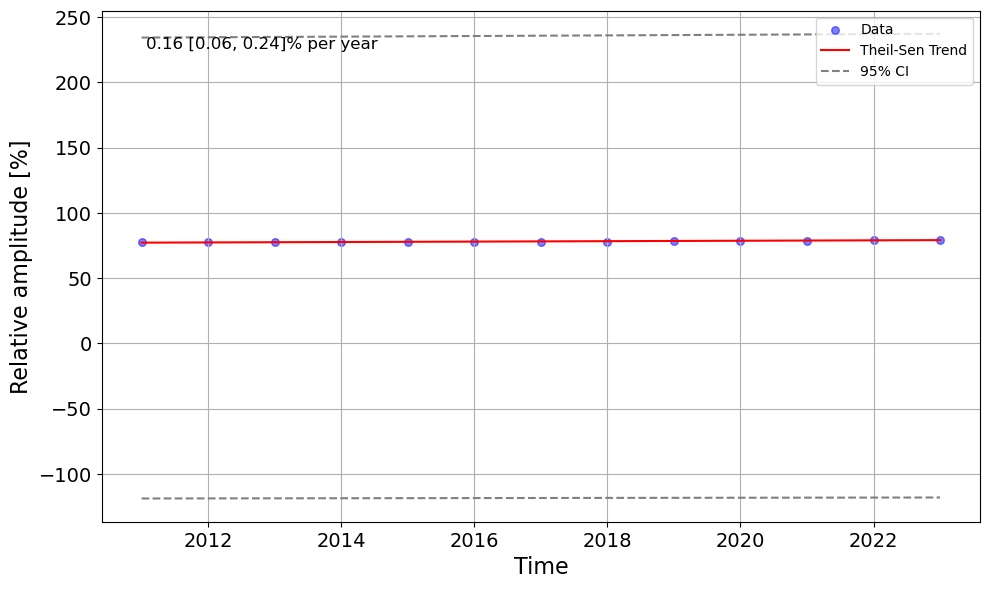

In [24]:
# Generate prediction lines
x_vals = np.linspace(data_rel_diff['x'].min(), data_rel_diff['x'].max(), 100)
y_pred = slope * x_vals + intercept
y_lower = lower_bound * x_vals + intercept
y_upper = upper_bound * x_vals + intercept

# Plot the data and trend lines
plt.figure(figsize=(10, 6))
plt.scatter(data_rel_diff['x'], data_rel_diff['y'], alpha=0.5, label='Data', s=30, color='blue')
plt.plot(x_vals, y_pred, color='red', label='Theil-Sen Trend')
plt.plot(x_vals, y_lower, '--', color='gray', label='95% CI')
plt.plot(x_vals, y_upper, '--', color='gray')

# Title with slope and confidence interval
#plt.title(f"Theil-Sen Trend: Slope = {slope:.2f}, 95% CI = [{lower_bound:.2f}, {upper_bound:.2f}]")
plt.text(
    0.05, 0.95,
    f"{slope:.2f} [{lower_bound:.2f}, {upper_bound:.2f}]% per year",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Relative amplitude [%]", fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
#plt.ylim(70, 80)
plt.grid(True)
plt.tight_layout()
#plt.savefig("C:\\YEAR1\\NMVOC\\figures\\rel_ampl.png", dpi=300)
plt.show()


In [49]:
relative_differences.min()

77.48552769207569

In [50]:
relative_differences.max()

79.50403334437831

In [51]:
grouped.agg(['min', 'max'])

,min,max
time,,
2011.0,0.163959,0.730322
2012.0,0.164484,0.730990
2013.0,0.164648,0.731297
2014.0,0.164451,0.731244
2015.0,0.163894,0.730829
2016.0,0.162975,0.730055
2017.0,0.161697,0.728919
2018.0,0.160057,0.727423
2019.0,0.158057,0.725566


In [52]:

slope, intercept, r_value, p_value, std_err = stats.linregress(relative_differences.index,relative_differences)
slope_theil, intercept_theil, low_slope_theil, high_slope_theil = stats.theilslopes(relative_differences, relative_differences.index,0.99)
res_theil=(slope_theil, intercept_theil, low_slope_theil, high_slope_theil)
res_theil

(0.16106627207421464,
 -247.05374844767817,
 0.08284865848427714,
 0.24039556943963447)

In [53]:
slope


0.16201822979229238

In [55]:
slope_theil

0.16106627207421464

In [ ]:
r_value*r_value

In [54]:
p_value

5.0642650536201324e-06

In [ ]:
regression_line = slope * relative_differences.index + intercept
reg_line_theil = slope_theil * relative_differences.index + intercept_theil
low_reg_line_theil = low_slope_theil * relative_differences.index + intercept_theil
high_reg_line_theil = high_slope_theil * relative_differences.index + intercept_theil 

In [65]:
reg_line_theil

Index([76.85052469356748, 77.01159096564169,  77.1726572377159,
        77.3337235097901, 77.49478978186431, 77.65585605393852,
       77.81692232601279,   77.977988598087,  78.1390548701612,
       78.30012114223541, 78.46118741430962, 78.62225368638383,
       78.78331995845804],
      dtype='float64', name='time')

In [ ]:
low_reg_line_theil

In [ ]:
relative_differences

In [ ]:
(relative_differences).plot(style='o')
plt.plot(relative_differences.index, regression_line, color='red', label=f'Fit line: y={slope_theil:.2f}x+{intercept_theil:.2f}')
#plt.plot(relative_differences.index, reg_line_theil, color='red', label=f'Fit line: y={slope_theil:.2f}x+{intercept_theil:.2f}')
#plt.plot(relative_differences.index, low_reg_line_theil, color='red', linestyle='dashed',linewidth=2, label=f'Fit line: y={low_slope_theil:.2f}x+{intercept_theil:.2f}')
#plt.plot(relative_differences.index, high_reg_line_theil, color='red', linestyle='dashed',linewidth=2, label=f'Fit line: y={high_slope_theil:.2f}x+{intercept_theil:.2f}')
plt.ylim(70,80)
plt.xlim(2010.5,2023.5)
plt.ylabel("Relative amplitude [%]")
plt.xlabel("Time")
plt.savefig("C:\\YEAR1\\NMVOC\\figures\\c3h8_relative_ampl.png", dpi=300)
#plt.legend()
plt.show()

In [66]:
#Mann Kendal test per year

df_trend = pd.DataFrame(np.array([np.array([int(x) for x in x0]),y1]).T,columns=["time","trend"])

df_trend_MK=df_trend.groupby('time')['trend'].agg(mk.original_test).reset_index()
param_cols='trend h p z Tau s var_s slope intercept'.split()
df_trend_MK[param_cols]=[row for row in df_trend_MK['trend']]
df_trend_MK



,time,trend,h,p,z,Tau,s,var_s,slope,intercept
0,2011.0,decreasing,True,0.021436,-2.300209,-0.18417,-484.0,44092.0,-0.003185,0.443368
1,2012.0,decreasing,True,0.021436,-2.300209,-0.18417,-484.0,44092.0,-0.00319,0.44414
2,2013.0,decreasing,True,0.021436,-2.300209,-0.18417,-484.0,44092.0,-0.003195,0.444551
3,2014.0,decreasing,True,0.021436,-2.300209,-0.18417,-484.0,44092.0,-0.0032,0.444601
4,2015.0,decreasing,True,0.020903,-2.309733,-0.184932,-486.0,44092.0,-0.003205,0.444291
5,2016.0,decreasing,True,0.019871,-2.328783,-0.186454,-490.0,44092.0,-0.00321,0.44362
6,2017.0,decreasing,True,0.019871,-2.328783,-0.186454,-490.0,44092.0,-0.003215,0.442588
7,2018.0,decreasing,True,0.019871,-2.328783,-0.186454,-490.0,44092.0,-0.00322,0.441195
8,2019.0,decreasing,True,0.019371,-2.338307,-0.187215,-492.0,44092.0,-0.003225,0.439442
9,2020.0,decreasing,True,0.019371,-2.338307,-0.187215,-492.0,44092.0,-0.00323,0.437329


In [ ]:
len(df_trend_MK.time)

In [67]:
result_MK = mk.original_test(df_trend.trend)
result_MK

Mann_Kendall_Test(trend='decreasing', h=True, p=0.01091291693123786, z=-2.545475027292769, Tau=-0.055190229110811735, s=-24826.0, var_s=95113208.66666667, slope=-2.634084654542597e-05, intercept=0.33850695847761164)

In [ ]:
#Mann Kendall test in the time range 2011-2023

result_MK = mk.original_test(df_trend.trend)
result_MK
#plot


fig, ax = plt.subplots(figsize=(12, 8))
trend_line = np.arange(len(df_trend_MK.time)) * result_MK.slope + result_MK.intercept

ax.plot(x0, trend)
ax.plot(df_trend_MK.time, trend_line)
ax.legend(['data', 'trend line'])

In [ ]:
param_cols='trend h p z Tau s var_s slope intercept'.split()
df_trend_MK[param_cols]=[row for row in df_trend_MK['trend']]
df_trend_MK

In [ ]:
#test with dataset from paper by Angot et al. 2021 
# #https://doi.org/10.5194/acp-21-15153-2021

#set a working directory till NMVOC folder
working_dir = "C:\\Year1\\"
# Find all CSV files (change the path if nedeed)
prop_files = glob.glob(working_dir+"NMVOC\EBAS_propane\\*.nas") 
print(prop_files)

# this function reads apropadjust times for all CSV files
dfs = []
for file in prop_files:
    df = load_and_adjust_time(file)
    dfs.append(df)

# concatenates all DataFrames (based on time)
prop_df = pd.concat(dfs).sort_values('starttime_dt').reset_index(drop=True)

# Show combined DataFrame
print(prop_df)

In [ ]:
#set a working directory till NMVOC folder
working_dir = "C:\\Year1\\"
# Find all CSV files (change the path if nedeed)
prop_files = glob.glob(working_dir+"NMVOC\\fitting_test\\sum_instaar_nmhc_2017.txt\\*.nas") 
print(prop_files)

# this function reads apropadjust times for all CSV files
dfs = []
for file in prop_files:
    df_lit = load_and_adjust_time(file)
    dfs.append(df_lit)

# concatenates all DataFrames (based on time)
df_lit = pd.concat(dfs).sort_values('starttime_dt').reset_index(drop=True)

# Show combined DataFrame
print(df_lit)

In [ ]:
#test with dataset from paper by Angot et al. 2021 
# #https://doi.org/10.5194/acp-21-15153-2021
df_lit = pd.read_csv('C:\\YEAR1\\NMVOC\\code\\fitting_test\\sum_instaar_nmhc_2017.txt', delimiter = "\t")
df_lit = df[df.propane != 99999.999]
df_lit=df_lit[df_lit.propane_numflag != 0.999]
df_lit

In [ ]:
#test with dataset from paper by Angot et al. 2021 
# #https://doi.org/10.5194/acp-21-15153-2021
#select given time range
min_date = df_lit['starttime'].min()
min_date = df_lit['starttime'].min()
max_date = df_lit['starttime'].max()
print(min_date)
print(max_date)
df_lit = df_lit[(df_lit['starttime'] > 2012.000) & (df_lit['starttime'] <= 2018.000)]
df_lit

In [ ]:
#test with dataset from paper by Angot et al. 2021 
# #https://doi.org/10.5194/acp-21-15153-2021
df_lit = df_lit.dropna()
df_lit["index"] = [i for i in range(len(df))]
df_lit = df_lit.set_index('index')
#print(CO2_df.head())
#df['starttime']= [df["starttime_dt"][i].year+ (df["starttime_dt"][i].dayofyear-1 + df["starttime_dt"][i].hour/24) /365 for i in range(len(df))]

xp = df_lit['starttime']
yp = df_lit['propane']

#print(xp[0:10])
filt = ccgfilt.ccgFilter(xp, yp, shortterm=30, longterm = 365, sampleinterval=0, numpolyterms=3, numharmonics=4, timezero=-1, gap = 1, debug=False)
#
mm = filt.getMonthlyMeans()
amps = filt.getAmplitudes()
tcup, tcdown = filt.getTrendCrossingDates()

# get x,y data for plotting
x0 = filt.xinterp
y1 = filt.getFunctionValue(x0)
y2 = filt.getPolyValue(x0)
y3 = filt.getSmoothValue(x0)
y4 = filt.getTrendValue(x0)
# Seasonal Cycle
# x and y are original data points
trend = filt.getTrendValue(x0)
detrend = y3 - trend
harmonics = filt.getHarmonicValue(x0)
smooth_cycle = harmonics + filt.smooth - filt.trend
# residuals from the function
resid_from_func = filt.resid
# smoothed residuals
resid_smooth = filt.smooth
# trend of residuals
resid_trend = filt.trend
# residuals about the smoothed line
resid_from_smooth = filt.yp - filt.getSmoothValue(xp)
# equally spaced interpolated data with function removed
x1 = filt.xinterp
y9 = filt.yinterp


#plt.plot(xp,yp,"bo",markersize=3,markeredgecolor="k",label="observations")
#plt.plot(x0,y1,"red",label="smooth curve")
#plt.plot(x0,y3,"blue",label="smooth plot")
plt.plot(x0,y4,"orange")
plt.plot(x0,trend,"green",label="trend curve")
plt.xlabel("Year")
plt.ylabel("Propane(pmol/mol)")
#plt.plot(x0,detrend,"red",label="detrend")
plt.legend()
#plt.savefig("co2_trend.png", dpi=300)
plt.show()

In [ ]:
res = stats.theilslopes(x, y, 0.90, method='separate')
lsq_res = stats.linrgeress(x,y)
res
